In [1]:
%%bash 

cat /Users/cmdb/qbb2020-answers/week3/BYxRM_segs_saccer3.bam.simplified.vcf | grep -v "^#" | wc -l


#--ld rs11102465 rs12061372

   16624


In [2]:
%%bash 





In [3]:
%%bash

awk '{gsub(/chrM/, "M"); gsub(/chrXVI/, "16"); gsub(/chrXV/, "15"); gsub(/chrXIV/, "14"); gsub(/chrXIII/, "13"); gsub(/chrXII/, "12"); gsub(/chrXI/, "11"); gsub(/chrX/, "10"); gsub(/chrIX/, "9"); gsub(/chrVIII/, "8"); gsub(/chrVII/, "7"); gsub(/chrVI/, "6"); gsub(/chrV/, "5"); gsub(/chrIV/, "4"); gsub(/chrIII/, "3"); gsub(/chrII/, "2"); gsub(/chrI/, "1"); print}' BYxRM_segs_saccer3.bam.simplified.vcf > numgen.vcf

In [4]:
%%bash
head -n 200 numgen.vcf


##fileformat=VCFv4.2
##fileDate=20170921
##source=freeBayes v1.1.0-dirty
##reference=genome/sacCer3.fa
##contig=<ID=1,length=230218>
##contig=<ID=2,length=813184>
##contig=<ID=3,length=316620>
##contig=<ID=4,length=1531933>
##contig=<ID=9,length=439888>
##contig=<ID=5,length=576874>
##contig=<ID=6,length=270161>
##contig=<ID=7,length=1090940>
##contig=<ID=8,length=562643>
##contig=<ID=10,length=745751>
##contig=<ID=11,length=666816>
##contig=<ID=12,length=1078177>
##contig=<ID=13,length=924431>
##contig=<ID=14,length=784333>
##contig=<ID=15,length=1091291>
##contig=<ID=16,length=948066>
##contig=<ID=M,length=85779>
##phasing=none
##commandline="freebayes -f genome/sacCer3.fa BYxRM_segs_saccer3.bam --use-best-n-alleles 4 --min-alternate-count 20 --region 1:0-10000"
##filter="QUAL > 50000"
##INFO=<ID=AF,Number=A,Type=Float,Description="Estimated allele frequency in the range (0,1]">
##FORMAT=<ID=GT,Number=1,Type=String,Description="Genotype">
##FORMAT=<ID=DP,Number=1,Type=Integer,Descrip

In [5]:
# %%bash
# ## The snps are all labeled as ".", so I am trying to rename all of them
# ## this is basically a python script. I need to figure out how to get it in bash

# count = 0
# labels = ()

# for i in numgen.vcf:
#     if "#" in i:
#         continue
#     count = count+1
#     lines = i.rstrip('\n\r').split('\t')
#     for lines[2] in i:
#         label = count
#         labels.append(label)
        
# print(labels)
        
        

bash: line 3: count: command not found
bash: line 4: syntax error near unexpected token `('
bash: line 4: `labels = ()'


In [18]:
%%bash
plink --vcf /Users/cmdb/qbb2020-answers/week3/numgen.vcf --ld . .


PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --ld . .
  --vcf /Users/cmdb/qbb2020-answers/week3/numgen.vcf

16384 MB RAM detected; reserving 8192 MB for main workspace.
--vcf: plink-temporary.bed + plink-temporary.bim + plink-temporary.fam written.
16624 variants loaded from .bim file.
1056 people (0 males, 0 females, 1056 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1056 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%34%35%36%37%38%39%40%41%42%43%44%45%46%47%48%49%50%5

In [6]:
%%bash
plink \
  --vcf BYxRM_segs_saccer3.bam.simplified.vcf \
  --pca \
  --allow-extra-chr \
  --mind

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --allow-extra-chr
  --mind
  --pca
  --vcf BYxRM_segs_saccer3.bam.simplified.vcf

16384 MB RAM detected; reserving 8192 MB for main workspace.
--vcf: plink-temporary.bed + plink-temporary.bim + plink-temporary.fam written.
16624 variants loaded from .bim file.
1056 people (0 males, 0 females, 1056 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .
105 people removed due to missing genotype data (--mind).
IDs written to plink.irem .
Using up to 8 threads (change this with --threads).
Before main variant filters, 951 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%34%

In [8]:
%%bash

head -n 100 plink.eigenvec


A01 01 0.0353455 0.0121191 0.0203633 0.0369758 -0.00371816 0.0383015 0.0280454 -0.00718582 0.0552279 4.30173e-05 -0.00998784 -0.00984027 -0.000946717 0.0163578 0.0189659 0.0449926 0.0187722 0.0251466 -0.0387737 0.0142384
A01 02 -0.0203733 -0.0115301 -0.00871792 -0.0703994 -0.0506287 0.0450617 -0.0699031 -0.0143431 0.0238492 0.0270039 0.0141224 0.00332691 -0.0039757 -0.0208873 -0.0326634 -0.0172422 0.0159907 -0.00790786 0.00872536 0.0139886
A01 03 -0.0172656 -0.00806361 -0.0522656 -0.0388474 -0.0382605 0.0282452 0.0462828 0.008466 0.00314205 -0.0309712 0.0150524 -0.00243935 -0.0487502 0.0479302 -0.0321832 0.00460651 -0.016738 0.00343947 -0.0637942 -0.0349545
A01 04 0.0207922 -0.0744735 -0.00745026 0.00797909 0.013607 0.02267 -0.0246187 0.0353385 -0.032396 -0.0188403 0.000669337 -0.00559284 0.00685793 0.0256263 0.0122854 0.0577782 0.021666 -0.0418856 0.0019378 -0.0437749
A01 05 -0.0319175 0.0685914 0.0250888 -0.00833838 0.0164201 0.0101749 0.0096589 -0.0512051 -0.0323806 0.030435 -0.0067

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
gwas = pd.read_csv("plink.eigenvec", sep = " ")
gwas



,A01,01,0.0353455,0.0121191,0.0203633,0.0369758,-0.00371816,0.0383015,0.0280454,-0.00718582,...,-0.00998784,-0.00984027,-0.000946717,0.0163578,0.0189659,0.0449926,0.0187722,0.0251466,-0.0387737,0.0142384
0,A01,2,-0.020373,-0.011530,-0.008718,-0.070399,-0.050629,0.045062,-0.069903,-0.014343,...,0.014122,0.003327,-0.003976,-0.020887,-0.032663,-0.017242,0.015991,-0.007908,0.008725,0.013989
1,A01,3,-0.017266,-0.008064,-0.052266,-0.038847,-0.038261,0.028245,0.046283,0.008466,...,0.015052,-0.002439,-0.048750,0.047930,-0.032183,0.004607,-0.016738,0.003439,-0.063794,-0.034954
2,A01,4,0.020792,-0.074473,-0.007450,0.007979,0.013607,0.022670,-0.024619,0.035339,...,0.000669,-0.005593,0.006858,0.025626,0.012285,0.057778,0.021666,-0.041886,0.001938,-0.043775
3,A01,5,-0.031918,0.068591,0.025089,-0.008338,0.016420,0.010175,0.009659,-0.051205,...,-0.006765,-0.012257,0.014609,-0.034157,-0.011838,0.025975,0.009821,0.030508,-0.011105,0.034869
4,A01,6,0.042603,0.042361,0.046544,-0.011683,0.033104,-0.005243,-0.053568,-0.022000,...,-0.059698,-0.000776,0.024051,0.037634,-0.016833,0.006960,0.012152,-0.022095,-0.016574,-0.018538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,A11,92,0.028258,0.029521,0.073246,0.007986,-0.023496,0.002155,-0.015471,-0.016469,...,-0.034350,-0.016404,-0.033016,0.025895,0.022025,0.021827,-0.000942,-0.013724,0.036798,0.037410
946,A11,93,-0.013469,-0.003927,-0.047575,-0.030728,-0.045670,0.016102,-0.035031,-0.048079,...,-0.007580,-0.020664,-0.011800,0.022192,0.014543,0.014683,-0.002665,-0.009335,0.020004,0.001750
947,A11,94,-0.000906,0.063399,0.005936,-0.000015,0.007514,-0.045466,0.020304,-0.008391,...,0.082074,0.032907,-0.035074,0.058970,0.040479,-0.038558,0.029731,-0.057467,-0.015875,-0.017111
948,A11,95,-0.002879,0.053984,0.013385,-0.003550,0.038551,-0.045108,0.005051,0.003467,...,0.010656,-0.029883,-0.024035,0.025607,-0.015668,0.012360,0.011888,0.017862,0.030352,0.055357


## Number 1: Plotting the first two PCAS

<AxesSubplot:xlabel='0.0121191', ylabel='0.0203633'>

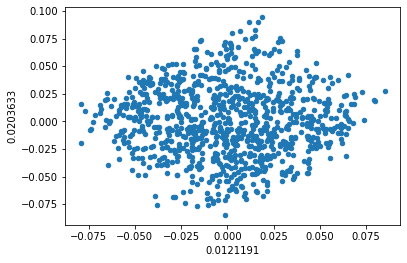

In [6]:
PCAS=gwas.plot.scatter(3, 4)
PCAS

In [7]:
f = open('BYxRM_segs_saccer3.bam.simplified.vcf', 'r')

AF = []

for i in f:
    if "#" in i:
        continue
    lines = i.rstrip('\n\r').split('\t')
    AFreq = lines[7]
    AF.append(float(AFreq[3:8]))
    
print(len(AF))


16624


## Question 2: Plot the allele frequency

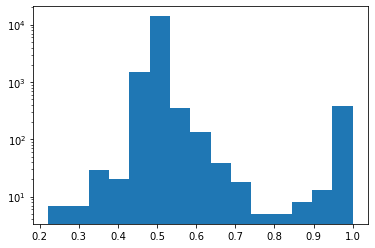

In [130]:
fig, ax =plt.subplots()
ax.hist(AF, bins=15)
ax.set_yscale("log")
plt.show()

## Question 3: PCAs

In [58]:
import os

pheno = open("/Users/cmdb/qbb2020-answers/week3/BYxRM_PhenoData.txt", "r")

newpheno = open("/Users/cmdb/qbb2020-answers/week3/newpheno", "w+")

for i in pheno:
#    lines = i.rstrip('\n\r').split('\t') 
    if "Cad" in i:
        newpheno.write("FID" + "\t" + "IID" + i)

    else:
        rest = i.split('_') 
        newpheno.write(rest[0] + "\t" + rest[1])
#         col= lines[0]
#         newcol=(col[0:3] + "\t" + col[4:])
#         rest=lines[1:]
#         newpheno.write(str(newcol) + "\t" + str(rest))
#         print(rest)


newpheno.close()




In [59]:
%%bash

less -S /Users/cmdb/qbb2020-answers/week3/newpheno

FID	IID	Cadmium_Chloride	Caffeine	Calcium_Chloride	Cisplatin	Cobalt_Chloride	Congo_red	Copper	Cycloheximide	Diamide	E6_Berbamine	Ethanol	Formamide	Galactose	Hydrogen_Peroxide	Hydroquinone	Hydroxyurea	Indoleacetic_Acid	Lactate	Lactose	Lithium_Chloride	Magnesium_Chloride	Magnesium_Sulfate	Maltose	Mannose	Menadione	Neomycin	Paraquat	Raffinose	SDS	Sorbitol	Trehalose	Tunicamycin	x4-Hydroxybenzaldehyde	x4NQO	x5-Fluorocytosine	x5-Fluorouracil	x6-Azauracil	Xylose	YNB	YNB:ph3	YNB:ph8	YPD	YPD:15C	YPD:37C	YPD:4C	Zeocin
A01	01	-7.32351970578731	0.279992827000249	0.313118165836545	1.65817907082079	-1.60444210190495	5.84161725611811	-4.13094977046224	0.821226166664529	3.62260156257758	-0.378746805086589	-0.6449544101999	0.736772421684145	1.46869950807288	4.25247880427656	-0.439429122584143	0.471260934436784	-0.502023574403563	-0.0196386553492135	-0.520403819717771	-3.04250228422253	-0.239535833991348	3.24339670861968	-3.94506679134117	2.13462934930907	2.02778180052776	-10.930132784538	1.533137890810

## Question 3: Principle Components

In [61]:
%%bash
plink \
  --vcf /Users/cmdb/qbb2020-answers/week3/numgen.vcf \
  --pheno /Users/cmdb/qbb2020-answers/week3/newpheno \
  --linear \
  --all-pheno \
  --allow-extra-chr \
  --allow-no-sex \
  --covar plink.eigenvec \
  --covar-number 1-10
  
# need to edit PhenoData

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --all-pheno
  --allow-extra-chr
  --allow-no-sex
  --covar plink.eigenvec
  --covar-number 1-10
  --linear
  --pheno /Users/cmdb/qbb2020-answers/week3/newpheno
  --vcf /Users/cmdb/qbb2020-answers/week3/numgen.vcf

16384 MB RAM detected; reserving 8192 MB for main workspace.
--vcf: plink-temporary.bed + plink-temporary.bim + plink-temporary.fam written.
16624 variants loaded from .bim file.
1056 people (0 males, 0 females, 1056 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .
799 phenotype values present after --pheno.
Using 1 thread (no multithreaded calculations invoked).
--covar: 10 out of 20 covariates loaded.
105 people were not seen in the covariate file.
Before main variant filters, 1056 founders and 0 nonfounders present.
Calculating allele frequencies... 0%

## Question 4: manhattan plot 

In [64]:
%%bash
grep 'ADD' plink.assoc.linear | sort -k9,9g | headv

bash: line 1: headv: command not found
grep: plink.assoc.linear: No such file or directory


In [65]:
gwas = pd.read_csv("plink.Cadmium_Chloride.assoc.linear", sep = "\s+")

gwas['logP'] = -1 * np.log10(gwas['P'])
gwas['snp_index'] = range(len(gwas))
gwas

,CHR,SNP,BP,A1,TEST,NMISS,BETA,STAT,P,logP,snp_index
0,1,.,1074,C,ADD,676,-0.5976,-1.62200,0.10540,0.977159,0
1,1,.,1074,C,COV1,676,10.2300,1.40100,0.16160,0.791559,1
2,1,.,1074,C,COV2,676,6.8520,0.95190,0.34150,0.466609,2
3,1,.,1074,C,COV3,676,-8.6080,-1.15900,0.24680,0.607655,3
4,1,.,1074,C,COV4,676,-9.3770,-1.26300,0.20710,0.683820,4
...,...,...,...,...,...,...,...,...,...,...,...
182859,16,.,942826,G,COV6,675,18.5200,2.49300,0.01291,1.889074,182859
182860,16,.,942826,G,COV7,675,-8.4760,-1.11900,0.26350,0.579219,182860
182861,16,.,942826,G,COV8,675,-10.7900,-1.44300,0.14960,0.825068,182861
182862,16,.,942826,G,COV9,675,4.7350,0.63920,0.52290,0.281581,182862


In [66]:
import numpy as np
import pandas as pd
import matplotlib

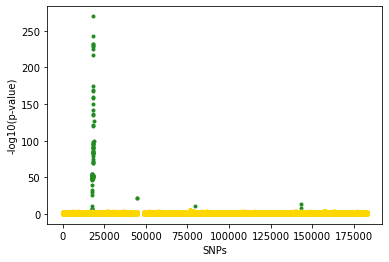

In [69]:


gwas['snp_index'] = range(len(gwas))

fig, ax = plt.subplots()

for chr in range(1, 23): 
    ax.scatter(gwas["snp_index"][gwas["CHR"] == chr][gwas["logP"] >= 5], gwas["logP"][gwas["CHR"] == chr][gwas["logP"] >= 5], marker = '.', color="forestgreen")
    ax.scatter(gwas["snp_index"][gwas["CHR"] == chr][gwas["logP"] < 5], gwas["logP"][gwas["CHR"] == chr][gwas["logP"] < 5], marker = '.', color="gold")
plt.xlabel("SNPs")
plt.ylabel("-log10(p-value)")
    
plt.show()


## Question 4: QQ Plot

In [70]:
gwas

,CHR,SNP,BP,A1,TEST,NMISS,BETA,STAT,P,logP,snp_index
0,1,.,1074,C,ADD,676,-0.5976,-1.62200,0.10540,0.977159,0
1,1,.,1074,C,COV1,676,10.2300,1.40100,0.16160,0.791559,1
2,1,.,1074,C,COV2,676,6.8520,0.95190,0.34150,0.466609,2
3,1,.,1074,C,COV3,676,-8.6080,-1.15900,0.24680,0.607655,3
4,1,.,1074,C,COV4,676,-9.3770,-1.26300,0.20710,0.683820,4
...,...,...,...,...,...,...,...,...,...,...,...
182859,16,.,942826,G,COV6,675,18.5200,2.49300,0.01291,1.889074,182859
182860,16,.,942826,G,COV7,675,-8.4760,-1.11900,0.26350,0.579219,182860
182861,16,.,942826,G,COV8,675,-10.7900,-1.44300,0.14960,0.825068,182861
182862,16,.,942826,G,COV9,675,4.7350,0.63920,0.52290,0.281581,182862


In [71]:
gwas_sorted = gwas.sort_values(by = "P")
gwas_sorted

,CHR,SNP,BP,A1,TEST,NMISS,BETA,STAT,P,logP,snp_index
18447,2,.,795756,C,ADD,706,-5.762,-58.53,1.300000e-270,269.886057,18447
18458,2,.,798782,A,ADD,713,-5.621,-52.27,4.736000e-244,243.324588,18458
18469,2,.,799317,A,ADD,707,-5.574,-50.16,3.872000e-233,232.412065,18469
18480,2,.,799991,G,ADD,712,-5.567,-49.79,3.325000e-232,231.478208,18480
18513,2,.,800746,C,ADD,720,5.521,49.16,1.957000e-230,229.708409,18513
...,...,...,...,...,...,...,...,...,...,...,...
182089,16,.,890346,T,COV6,673,NaN,NaN,NaN,NaN,182089
182090,16,.,890346,T,COV7,673,NaN,NaN,NaN,NaN,182090
182091,16,.,890346,T,COV8,673,NaN,NaN,NaN,NaN,182091
182092,16,.,890346,T,COV9,673,NaN,NaN,NaN,NaN,182092


In [72]:
gwas_sorted['uniform_points'] = range(0, len(gwas_sorted))
gwas_sorted['uniform_pval'] = (gwas_sorted['uniform_points'] + 1) / len(gwas_sorted)
gwas_sorted['uniform_logP'] = -1 * np.log10(gwas_sorted['uniform_pval'])
gwas_sorted

,CHR,SNP,BP,A1,TEST,NMISS,BETA,STAT,P,logP,snp_index,uniform_points,uniform_pval,uniform_logP
18447,2,.,795756,C,ADD,706,-5.762,-58.53,1.300000e-270,269.886057,18447,0,0.000005,5.262128
18458,2,.,798782,A,ADD,713,-5.621,-52.27,4.736000e-244,243.324588,18458,1,0.000011,4.961098
18469,2,.,799317,A,ADD,707,-5.574,-50.16,3.872000e-233,232.412065,18469,2,0.000016,4.785007
18480,2,.,799991,G,ADD,712,-5.567,-49.79,3.325000e-232,231.478208,18480,3,0.000022,4.660068
18513,2,.,800746,C,ADD,720,5.521,49.16,1.957000e-230,229.708409,18513,4,0.000027,4.563158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182089,16,.,890346,T,COV6,673,NaN,NaN,NaN,NaN,182089,182859,0.999978,0.000009
182090,16,.,890346,T,COV7,673,NaN,NaN,NaN,NaN,182090,182860,0.999984,0.000007
182091,16,.,890346,T,COV8,673,NaN,NaN,NaN,NaN,182091,182861,0.999989,0.000005
182092,16,.,890346,T,COV9,673,NaN,NaN,NaN,NaN,182092,182862,0.999995,0.000002


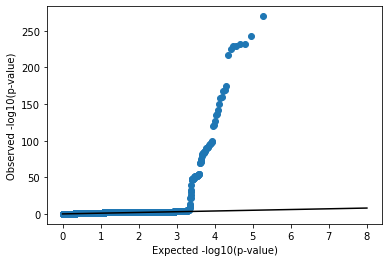

In [74]:
gwas['snp_index'] = range(len(gwas))

fig, ax = plt.subplots()

ax.scatter(gwas_sorted["uniform_logP"], gwas_sorted["logP"])
ax.plot([8,0], [8, 0], color = "black")

plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

## Question 5: One of the traits

In [113]:
%%bash
grep "795756" numgen.vcf > basepair.txt
#the line above gets all the of genotype data for bp 795756, which has the smallest p value

In [121]:
# the script below removes the :number from the value so you just have the number/number
bp = open("/Users/cmdb/qbb2020-answers/week3/basepair.txt", "r")
newfile = open("newfile.txt", "a")

bplist = []

for i in bp:
    count += 1
    lines = i.rstrip('\n\r').split('\t')
    for column in lines:
        bplist.append(column[0:3])
newlist= bplist[9:-1]
print(newlist)

# get phenotype
# 1. use phenotype file
# 2. 

['0/0', '0/0', '1/1', '0/0', '1/1', '1/1', '0/0', '0/0', '0/0', '0/0', '1/1', '0/0', '1/1', '0/0', '0/0', '1/1', '0/0', '0/0', '0/0', '0/0', '1/1', '1/1', '1/1', '1/1', '1/1', '0/0', '1/1', '0/0', '1/1', '0/0', '0/0', '1/1', '0/0', '0/0', '1/1', '0/0', '0/0', '1/1', '0/0', '1/1', '1/1', '1/1', '0/0', '1/1', '0/0', '0/0', '0/0', '1/1', '1/1', '1/1', '0/0', '1/1', '0/0', '0/0', '1/1', '1/1', '0/0', '1/1', '0/0', '1/1', '1/1', '1/1', '0/0', '0/0', '1/1', '0/0', '0/0', '1/1', '1/1', '1/1', '1/1', '0/0', '0/0', '0/0', '1/1', '1/1', '0/0', './.', '0/0', '0/0', '0/0', '0/0', '1/1', '0/0', '1/1', '0/0', './.', '0/0', '1/1', '0/0', '1/1', '1/1', '0/0', '1/1', '0/0', '0/0', '0/0', '1/1', '1/1', '1/1', '0/0', '1/1', '1/1', '0/0', '0/0', '0/0', '1/1', '1/1', '0/0', '1/1', '0/0', '0/0', '0/0', '1/1', '0/0', '1/1', '1/1', '1/1', '1/1', '1/1', '1/1', '0/0', '0/0', './.', '0/0', '0/0', '1/1', '1/1', '0/0', '1/1', '1/1', '0/0', '0/0', '0/0', '1/1', '1/1', '1/1', './.', '0/0', '1/1', '1/1', '1/1', '1/1'

In [ ]:
#do I need to make a dictionary? 
#Use the identified in phenodata.txt (ex: A01_01) as the key take the value from cadium_chloride column as the value
#Then take the corresponding identifier
#can you use the eigenvectors for the phenotypes 

In [125]:
boxlist1 = []
boxlist2 = []
boxlist3 = []

if x in newlist == "0/0":
    boxlist1.append["yes"]
#     get corresponding values from BYxRM_PhenoData.txt
#     append phenotype to boxlist1
# if x in newlist == "1/1":
#     get corresponding values from BYxRM_PhenoData.txt
#     append phenotype to boxlist2
# if x in newlistt == "0/1":
#     get corresponding values from BYxRM_PhenoData.txt
#     append phenotype to boxlist3
    
print(boxlist1)

NameError: name 'x' is not defined

In [124]:
gwas["snp_index"]

0              0
1              1
2              2
3              3
4              4
           ...  
182859    182859
182860    182860
182861    182861
182862    182862
182863    182863
Name: snp_index, Length: 182864, dtype: int64

In [ ]:
## Acadia made 2 data frames and then merged them